In [119]:
! pip install wandb

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     |████████████████████████████████| 1.7 MB 1.6 MB/s            
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
     |████████████████████████████████| 143 kB 118.9 MB/s            
  Using cached promise-2.3-py3-none-any.whl
  Using cached GitPython-3.1.26-py3-none-any.whl (180 kB)
  Using cached yaspin-2.1.0-py3-none-any.whl (18 kB)
  Using cached shortuuid-1.0.8-py3-none-any.whl (9.5 kB)
  Using cached pathtools-0.1.2-py3-none-any.whl
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Preparing metadata (setup.py) ... done
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=c5ca77b3ea24ee69c466e7f47610fa2a700860df4f7fe931465d97dce043f76b
  Stored in directory: /home/ubuntu/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
Successfully built termcolor


In [121]:
%matplotlib inline

import os
from glob import glob
import pickle

from PIL import Image
import matplotlib.pyplot as plt

import cv2
import numpy as np
import pickle
# import nibabel as nib
import random

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset, DataLoader
from torchvision.models.densenet import densenet121
import torchvision.transforms as T
import wandb

In [3]:
import matplotlib.cm as cm

## Data Directory

## 1. Extracting layer INDEX by tumor segmentation data

## 2. Extracting MRI pixel array: using INDEX in #1

### Load CT1, T2 data

### Internal data
Split into train/validation/test data

#### CT1

#### T2

In [4]:
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_train_gbm.pickle', 'rb') as f:
    x_train_gbm = pickle.load(f)
    
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_val_gbm.pickle', 'rb') as f:
    x_val_gbm = pickle.load(f)

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_test_gbm.pickle', 'rb') as f:
    x_test_gbm = pickle.load(f)
    

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_train_meta.pickle', 'rb') as f:
    x_train_meta = pickle.load(f)

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_val_meta.pickle', 'rb') as f:
    x_val_meta = pickle.load(f)

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_test_meta.pickle', 'rb') as f:
    x_test_meta = pickle.load(f)
    
    
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_train_gbm_t2.pickle', 'rb') as f:
    x_train_gbm_t2 = pickle.load(f)

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_val_gbm_t2.pickle', 'rb') as f:
    x_val_gbm_t2 = pickle.load(f)

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_test_gbm_t2.pickle', 'rb') as f:
    x_test_gbm_t2 = pickle.load(f)

    
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_train_meta_t2.pickle', 'rb') as f:
    x_train_meta_t2 = pickle.load(f)

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_val_meta_t2.pickle', 'rb') as f:
    x_val_meta_t2 = pickle.load(f)

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_test_meta_t2.pickle', 'rb') as f:
    x_test_meta_t2 = pickle.load(f)

In [5]:
len(x_train_gbm), len(x_train_meta), len(x_val_gbm), len(x_val_meta), len(x_test_gbm), len(x_test_meta)

(1205, 590, 135, 65, 200, 200)

In [6]:
len(x_train_gbm_t2), len(x_train_meta_t2), len(x_val_gbm_t2), len(x_val_meta_t2), len(x_test_gbm_t2), len(x_test_meta_t2)

(1205, 590, 135, 65, 200, 200)

### Asan (External) test data

#### CT1

#### T2

In [7]:
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_ext_gbm.pickle', 'rb') as f:
    x_ext_gbm = pickle.load(f)

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_ext_meta.pickle', 'rb') as f:
    x_ext_meta = pickle.load(f)
    
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_ext_gbm_t2.pickle', 'rb') as f:
    x_ext_gbm_t2 = pickle.load(f)

with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model23_data/x_ext_meta_t2.pickle', 'rb') as f:
    x_ext_meta_t2 = pickle.load(f)

In [26]:
len(x_ext_gbm), len(x_ext_meta), len(x_ext_gbm_t2), len(x_ext_meta_t2)

(505, 210, 505, 210)

## 3. Data Preprocessing


### Resize > Augmentation > Data Shuffle

In [8]:
def pre(data):
    img = Image.fromarray(data.astype(np.float32))
    img_resize = img.resize((224, 224))
    img_array = np.array(img_resize)
    img_array = np.expand_dims(img_array, -1)
    return img_array

In [9]:
def make_3_channel(ct1, t2):
    
    concat=[]
    for i in range(len(ct1)):
        ct1_array = pre(ct1[i])
        t2_array = pre(t2[i])
        img_array = np.concatenate((ct1_array, ct1_array, t2_array), axis=2)
        concat.append(img_array)
        
    return concat

In [10]:
def shuffle(x_data, y_data, seed_=42):
    zip_data = [[x,y] for x, y in zip(x_data, y_data)]

    random.seed(seed_)
    random.shuffle(zip_data)

    x_data = np.array([n[0] for n in zip_data])
    y_data = np.array([n[1] for n in zip_data])

    return x_data, y_data

#### Train

In [11]:
train_0 = make_3_channel(x_train_gbm, x_train_gbm_t2)
train_1 = make_3_channel(x_train_meta, x_train_meta_t2)

In [12]:
y_train_0 = np.zeros(len(train_0))
y_train_1 = np.ones(len(train_1))

In [13]:
x_train = np.concatenate((train_0, train_1), axis=0)
y_train = np.concatenate((y_train_0, y_train_1), axis=0)

#### Validation

In [14]:
val_0 = make_3_channel(x_val_gbm, x_val_gbm_t2)
val_1 = make_3_channel(x_val_meta, x_val_meta_t2)

In [15]:
y_val_0 = np.zeros(len(val_0))
y_val_1 = np.ones(len(val_1))

In [16]:
x_valid = np.concatenate((val_0, val_1), axis=0)
y_valid = np.concatenate((y_val_0, y_val_1), axis=0)

#### Internal Test

In [17]:
test_0 = make_3_channel(x_test_gbm, x_test_gbm_t2)
test_1 = make_3_channel(x_test_meta, x_test_meta_t2)

In [18]:
y_test_0 = np.zeros(len(test_0))
y_test_1 = np.ones(len(test_1))

In [19]:
x_test = np.concatenate((test_0, test_1), axis=0)
y_test = np.concatenate((y_test_0, y_test_1), axis=0)

#### External Test

In [20]:
ext_0 = make_3_channel(x_ext_gbm, x_ext_gbm_t2)
ext_1 = make_3_channel(x_ext_meta, x_ext_meta_t2)

In [21]:
y_ext_0 = np.zeros(len(ext_0))
y_ext_1 = np.ones(len(ext_1))

In [22]:
x_ext = np.concatenate((ext_0, ext_1), axis=0)
y_ext = np.concatenate((y_ext_0, y_ext_1), axis=0)

In [29]:
'''
# Train
x_train, y_train = shuffle(x_train, y_train)

# Validation 
x_valid, y_valid = shuffle(x_valid, y_valid)

# Internal Test
x_test, y_test = shuffle(x_test, y_test)

# External Test
x_ext, y_ext = shuffle(x_ext, y_ext)
'''

### One-hot Encoding

In [42]:
# PyTorch 에서는 Categorical classification이 따로 지원이 되지 않아 binary classification으로 진행 (gbm = 0, meta = 1)

# y_train = keras.utils.to_categorical(y_train)
# y_valid = keras.utils.to_categorical(y_valid)
# y_test = keras.utils.to_categorical(y_test)
# y_ext = keras.utils.to_categorical(y_ext)

In [43]:
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape, x_test.shape, y_test.shape, x_ext.shape, y_ext.shape

((1795, 224, 224, 3),
 (1795, 2),
 (200, 224, 224, 3),
 (200, 2),
 (400, 224, 224, 3),
 (400, 2),
 (715, 224, 224, 3),
 (715, 2))

In [180]:
'''
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model21_data/iou_NOshuffle/x_test_noshuffle.pickle', 'wb') as f:
    pickle.dump(x_test, f)
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model21_data/iou_NOshuffle/y_test_noshuffle.pickle', 'wb') as f:
    pickle.dump(y_test, f)
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model21_data/iou_NOshuffle/x_ext_noshuffle.pickle', 'wb') as f:
    pickle.dump(x_ext, f)
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model21_data/iou_NOshuffle/y_ext_noshuffle.pickle', 'wb') as f:
    pickle.dump(y_ext, f)
'''

## 4. Modeling

In [53]:
# PyTorch Version

class MRIDataset(Dataset):
    def __init__(self, img, target, transform=None):
        # img.shape -> [num_img, H, W, C], target -> 0 or 1
        
        self.img = img
        self.target = target
        self.transform = transform
    
    def __len__(self):
        return self.img.shape[0]
    
    def __getitem__(self, idx):
        
        img = self.img[idx]
        target = self.target[idx]
        
        if self.transform:
            img = self.transform(img)
        
        return img, target

In [90]:
transform = {
    'train': T.Compose([
        T.ToTensor(),
        T.RandomRotation(degrees=30),
        T.RandomHorizontalFlip(p=0.5),
        T.RandomVerticalFlip(p=0.5),
#         T.Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225))
    ]),
    'test': T.Compose([
        T.ToTensor(),
#         T.Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225))

    ])
}

In [91]:
train_dataset = MRIDataset(x_train, y_train, transform=transform['train'])
valid_dataset = MRIDataset(x_valid, y_valid, transform=transform['test'])
test_dataset = MRIDataset(x_test, y_test, transform=transform['test'])
ext_dataset = MRIDataset(x_ext, y_ext, transform=transform['test'])

In [92]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
ext_loader = DataLoader(ext_dataset, batch_size=32, shuffle=False)

torch.Size([32, 3, 224, 224]) tensor([0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.],
       dtype=torch.float64)
tensor(-1.2243) tensor(7.4303)


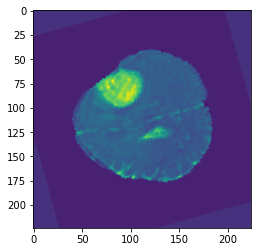

In [93]:
for i, item in enumerate(train_loader):
    img, label = item
    print(img.size(), label)
    _img = img[3]
    plt.imshow(_img.permute(1, 2, 0)[..., 2])
    print(_img.min(), _img.max())
    break

### Train

In [106]:
# Deep Ensemble - PyTorch Version

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

densenet = densenet121(pretrained=True)
# binary classiciation -> num_class = 1
densenet.classifier = nn.Linear(1024, 1)

nets = 5
model = [0] * nets

for i in range(nets):
    model[i] = densenet.to(device)

cuda


In [124]:
# Hyperparameters

# TODO: check model_num
model_num = '220208_PyTorch_'

wandb.init(project = 'MRI-test', entity = 'sjeom')

wandb.config = {
    "learning_rate": 0.003,
    "epochs": 30,
    "batch_size": 32
}

In [125]:
epochs = 30
criterion = nn.BCEWithLogitsLoss()

for i, net in enumerate(model):
    
    # TODO: check model_name and model_path
#     model_name = model_num + str(i + 1)
#     model_path = os.path.join('save_model', model_name + '_bestmodel.h5')
    
    optimizer = optim.Adam(net.parameters(), lr = 1e-3)
    for epoch in range(epochs):
        
        running_loss = 0.0
        train_total = 0
        train_correct = 0
        for i, (img, label) in enumerate(train_loader):
            
            img, label = img.to(device), label.to(device)
            
            optimizer.zero_grad()
            
            output = net(img)
            loss = criterion(output, label.unsqueeze(-1))
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            train_total += label.size(0)
            _pred = torch.sigmoid(output)
            pred = _pred >= torch.cuda.FloatTensor([0.5])
            
            train_correct += (pred.squeeze(-1) == label).sum().item()



#             if i % 10 == 9:
#                 print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 10:.3f}')
#                 running_loss = 0.0
                
        val_loss = 0.0
        val_correct = 0.0
        total = 0
        with torch.no_grad():
            for (img, label) in valid_loader:
                img, label = img.to(device), label.to(device)
                
                output = net(img)
                _pred = torch.sigmoid(output)
                pred = _pred >= torch.cuda.FloatTensor([0.5])
                loss = criterion(output, label.unsqueeze(-1))
                total += label.size(0)
                val_loss += loss.item()
                val_correct += (pred.squeeze(-1) == label).sum().item()
         
        print(f'Accuracy of the network on the {total} images: {100 * val_correct // total} % and Loss is {val_loss / total}')
        
        wandb.log({
            'train_loss': running_loss / train_total,
            'train_acc': correct / train_total,
            'valid_loss': val_loss / total,
            'valid_acc': correct / total
        })

Accuracy of the network on the 200 images: 68.0 % and Loss is 0.07987725728495604
Accuracy of the network on the 200 images: 62.0 % and Loss is 0.08333977530210744
Accuracy of the network on the 200 images: 64.0 % and Loss is 0.07460718721415047
Accuracy of the network on the 200 images: 63.0 % and Loss is 0.08355284663789768
Accuracy of the network on the 200 images: 64.0 % and Loss is 0.0906311190725687
Accuracy of the network on the 200 images: 65.0 % and Loss is 0.0905106272781296
Accuracy of the network on the 200 images: 64.0 % and Loss is 0.10277162310665744


KeyboardInterrupt: 

Epoch 1/30
28/28 [==============================] - ETA: 0s - loss: 0.5498 - accuracy: 0.7678
Epoch 00001: val_loss improved from inf to 1.42921, saving model to save_model/220204_1205_1_bestmodel.h5
28/28 [==============================] - 22s 800ms/step - loss: 0.5498 - accuracy: 0.7678 - val_loss: 1.4292 - val_accuracy: 0.4600
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 0.3044 - accuracy: 0.8717
Epoch 00002: val_loss did not improve from 1.42921
28/28 [==============================] - 18s 632ms/step - loss: 0.3044 - accuracy: 0.8717 - val_loss: 12.5930 - val_accuracy: 0.6750
Epoch 3/30
28/28 [==============================] - ETA: 0s - loss: 0.2609 - accuracy: 0.8960
Epoch 00003: val_loss did not improve from 1.42921
28/28 [==============================] - 18s 634ms/step - loss: 0.2609 - accuracy: 0.8960 - val_loss: 2.8330 - val_accuracy: 0.4150
Epoch 4/30
28/28 [==============================] - ETA: 0s - loss: 0.3582 - accuracy: 0.8446
Epoch 00004: val_lo

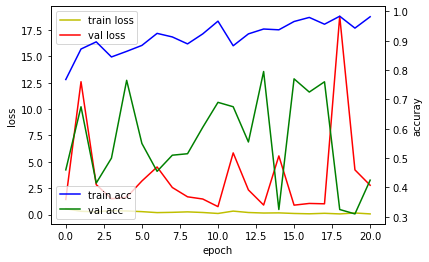

CNN 1: Epochs=30, Train accuracy=0.98325, Validation accuracy=0.79500 

Epoch 1/30
28/28 [==============================] - ETA: 0s - loss: 0.4671 - accuracy: 0.7955
Epoch 00001: val_loss improved from inf to 4.66563, saving model to save_model/220204_1205_2_bestmodel.h5
28/28 [==============================] - 21s 768ms/step - loss: 0.4671 - accuracy: 0.7955 - val_loss: 4.6656 - val_accuracy: 0.4800
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 0.3810 - accuracy: 0.8302
Epoch 00002: val_loss did not improve from 4.66563
28/28 [==============================] - 19s 675ms/step - loss: 0.3810 - accuracy: 0.8302 - val_loss: 12.4237 - val_accuracy: 0.3250
Epoch 3/30
28/28 [==============================] - ETA: 0s - loss: 0.3230 - accuracy: 0.8499
Epoch 00003: val_loss did not improve from 4.66563
28/28 [==============================] - 19s 677ms/step - loss: 0.3230 - accuracy: 0.8499 - val_loss: 5.9884 - val_accuracy: 0.3700
Epoch 4/30
28/28 [=======================

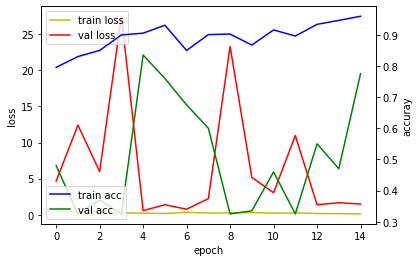

CNN 2: Epochs=30, Train accuracy=0.95956, Validation accuracy=0.83500 

Epoch 1/30
28/28 [==============================] - ETA: 0s - loss: 0.5425 - accuracy: 0.7556
Epoch 00001: val_loss improved from inf to 149.47772, saving model to save_model/220204_1205_3_bestmodel.h5
28/28 [==============================] - 21s 755ms/step - loss: 0.5425 - accuracy: 0.7556 - val_loss: 149.4777 - val_accuracy: 0.3250
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 0.3963 - accuracy: 0.8198
Epoch 00002: val_loss did not improve from 149.47772
28/28 [==============================] - 19s 674ms/step - loss: 0.3963 - accuracy: 0.8198 - val_loss: 178.5459 - val_accuracy: 0.3250
Epoch 3/30
28/28 [==============================] - ETA: 0s - loss: 0.2839 - accuracy: 0.8769
Epoch 00003: val_loss improved from 149.47772 to 6.35059, saving model to save_model/220204_1205_3_bestmodel.h5
28/28 [==============================] - 20s 709ms/step - loss: 0.2839 - accuracy: 0.8769 - val_loss: 6.3

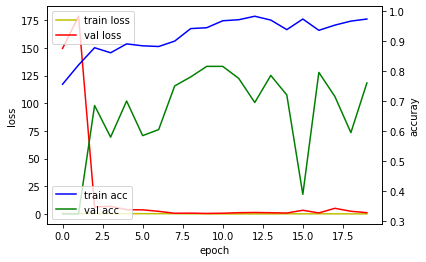

CNN 3: Epochs=30, Train accuracy=0.98151, Validation accuracy=0.81500 

Epoch 1/30
28/28 [==============================] - ETA: 0s - loss: 0.5709 - accuracy: 0.7499
Epoch 00001: val_loss improved from inf to 41.02223, saving model to save_model/220204_1205_4_bestmodel.h5
28/28 [==============================] - 21s 755ms/step - loss: 0.5709 - accuracy: 0.7499 - val_loss: 41.0222 - val_accuracy: 0.6750
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 0.3795 - accuracy: 0.8296
Epoch 00002: val_loss improved from 41.02223 to 37.52854, saving model to save_model/220204_1205_4_bestmodel.h5
28/28 [==============================] - 20s 732ms/step - loss: 0.3795 - accuracy: 0.8296 - val_loss: 37.5285 - val_accuracy: 0.6750
Epoch 3/30
28/28 [==============================] - ETA: 0s - loss: 0.3379 - accuracy: 0.8585
Epoch 00003: val_loss improved from 37.52854 to 2.29661, saving model to save_model/220204_1205_4_bestmodel.h5
28/28 [==============================] - 20s 712ms

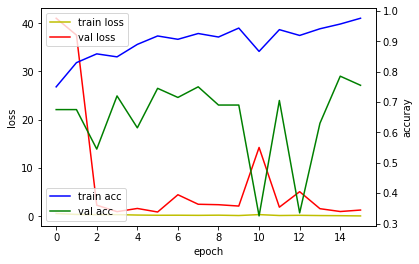

CNN 4: Epochs=30, Train accuracy=0.97574, Validation accuracy=0.78500 

Epoch 1/30
28/28 [==============================] - ETA: 0s - loss: 0.6046 - accuracy: 0.7597
Epoch 00001: val_loss improved from inf to 11.06369, saving model to save_model/220204_1205_5_bestmodel.h5
28/28 [==============================] - 21s 755ms/step - loss: 0.6046 - accuracy: 0.7597 - val_loss: 11.0637 - val_accuracy: 0.3250
Epoch 2/30
28/28 [==============================] - ETA: 0s - loss: 0.3550 - accuracy: 0.8463
Epoch 00002: val_loss did not improve from 11.06369
28/28 [==============================] - 19s 675ms/step - loss: 0.3550 - accuracy: 0.8463 - val_loss: 36.0027 - val_accuracy: 0.3250
Epoch 3/30
28/28 [==============================] - ETA: 0s - loss: 0.3676 - accuracy: 0.8267
Epoch 00003: val_loss improved from 11.06369 to 4.91365, saving model to save_model/220204_1205_5_bestmodel.h5
28/28 [==============================] - 20s 707ms/step - loss: 0.3676 - accuracy: 0.8267 - val_loss: 4.9137 -

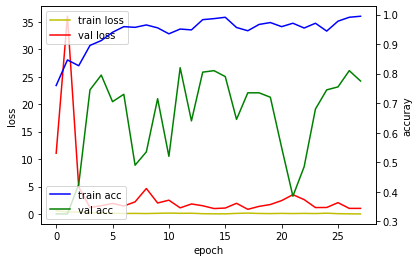

CNN 5: Epochs=30, Train accuracy=0.99422, Validation accuracy=0.82000 



In [43]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

#train networks
history = [0]*nets
for j in range(nets):
    model_name= model_num +str(j+1)
    model_path = os.path.join('save_model', model_name + '_bestmodel.h5')

    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=model_path,
                                                    monitor='val_loss',
                                                    verbose=1,
                                                    save_weights_only=False,
                                                    save_best_only=True,
                                                    mode='auto',
                                                    save_freq='epoch')
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
    
    train_datagen.fit(x_train)
    valid_datagen.fit(x_valid)
    
    history[j] = model[j].fit(train_datagen.flow(x_train, y_train, batch_size=32), 
                             validation_data=valid_datagen.flow(x_valid, y_valid, batch_size=20), 
                             epochs=epochs, 
                             steps_per_epoch=x_train.shape[0]//32, callbacks=[annealer, checkpoint, early_stopping], verbose=1)
    
    
    # 5. 모델 학습 과정 표시하기

    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(history[j].history['loss'], 'y', label='train loss')
    loss_ax.plot(history[j].history['val_loss'], 'r', label='val loss')

    acc_ax.plot(history[j].history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history[j].history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

    
    
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f} \n".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

In [ ]:
# DECREASE LEARNING RATE EACH EPOCH
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x)

#train networks
history = [0]*nets
for j in range(nets):
    model_name= model_num +str(j+1)
    model_path = os.path.join('save_model', model_name + '_bestmodel.h5')

    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=model_path,
                                                    monitor='val_loss',
                                                    verbose=1,
                                                    save_weights_only=False,
                                                    save_best_only=True,
                                                    mode='auto',
                                                    save_freq='epoch')
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
    
    train_datagen.fit(x_train)
    valid_datagen.fit(x_valid)
    
    history[j] = model[j].fit(train_datagen.flow(x_train, y_train, batch_size=32), 
                             validation_data=valid_datagen.flow(x_valid, y_valid, batch_size=20), 
                             epochs=epochs, 
                             steps_per_epoch=x_train.shape[0]//32, callbacks=[annealer, checkpoint, early_stopping], verbose=1)
    
    
    # 5. 모델 학습 과정 표시하기

    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    loss_ax.plot(history[j].history['loss'], 'y', label='train loss')
    loss_ax.plot(history[j].history['val_loss'], 'r', label='val loss')

    acc_ax.plot(history[j].history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history[j].history['val_accuracy'], 'g', label='val acc')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')

    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

    
    
    print("CNN {0:d}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f} \n".format(
        j+1,epochs,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

In [9]:
nets = 5
model = [0]*5
model[0] = keras.models.load_model("save_model/220111_1240_1_bestmodel.h5")
model[1] = keras.models.load_model("save_model/220111_1240_2_bestmodel.h5")
model[2] = keras.models.load_model("save_model/220111_1240_3_bestmodel.h5")
model[3] = keras.models.load_model("save_model/220111_1240_4_bestmodel.h5")
model[4] = keras.models.load_model("save_model/220111_1240_5_bestmodel.h5")

[2022-01-24 02:18:17.928 ip-10-0-1-67:3081 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-01-24 02:18:18.008 ip-10-0-1-67:3081 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.


## 5. Test

In [44]:
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, f1_score, balanced_accuracy_score, classification_report, roc_curve, precision_score

In [45]:
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver operating characteristic')
    plt.plot([0, 1], [0, 1], 'k--', label="random guess")
    plt.show()

In [46]:
def matrix(y_true, y_pred, y_proba):
    conf_mat = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
    TP = conf_mat[1][1]
    TN = conf_mat[0][0]
    FN = conf_mat[1][0]
    FP = conf_mat[0][1]

    acc = round((TP+TN)/(TP+TN+FP+FN), 4)
    sens = round(TP/(TP+FN), 4)
    spec = round(TN/(TN+FP), 4)
    auroc = round(roc_auc_score(y_true, y_proba), 4)
    precision = round(precision_score(y_true.argmax(axis=1), y_pred.argmax(axis=1)), 4)
    recall = round(recall_score(y_true.argmax(axis=1), y_pred.argmax(axis=1)), 4)
    f1score = round(f1_score(y_true.argmax(axis=1), y_pred.argmax(axis=1)), 4)
    w_acc = round(balanced_accuracy_score(y_true.argmax(axis=1), y_pred.argmax(axis=1)), 4)

    print(conf_mat, "\n")
    print("Acc", acc)
    print("Sensitivity", sens)
    print("Specificity", spec)
    print("AUROC", auroc)
    print('Precision', precision)
    print("Recall", recall)
    print("F1",  f1score)
    print("Weighted accuracy", w_acc, "\n")
    print(classification_report(y_true, y_pred))


    fpr, tpr, thresholds = roc_curve(y_true.argmax(axis=1), y_pred.argmax(axis=1))

    plt.figure(figsize=(6,6))
    plot_roc(fpr, tpr)
    roc_auc_score(y_true, y_proba)

### Internal Test

In [47]:
# Single
int_single_proba= []
for m in model:
    proba = m.predict(x_test)
    int_single_proba.append(proba)
    
int_single_pred = []
for s in int_single_proba:
    proba = (s > 0.5).astype(np.int64)
    int_single_pred.append(proba)
    
# Ensemble
int_results = np.zeros( (x_test.shape[0],2) )
for s in int_single_proba:
    int_results = int_results + s

int_y_proba = int_results/5
int_y_pred = (int_y_proba > 0.5).astype(np.int64)

[[ 16 184]
 [  1 199]] 

Acc 0.5375
Sensitivity 0.995
Specificity 0.08
AUROC 0.7178
Precision 0.5196
Recall 0.995
F1 0.6827
Weighted accuracy 0.5375 

              precision    recall  f1-score   support

           0       0.94      0.08      0.15       200
           1       0.52      0.99      0.68       200

   micro avg       0.54      0.54      0.54       400
   macro avg       0.73      0.54      0.42       400
weighted avg       0.73      0.54      0.42       400
 samples avg       0.54      0.54      0.54       400



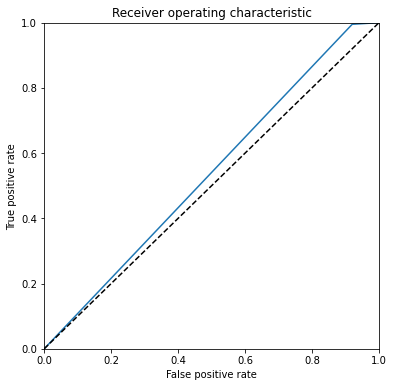

In [48]:
matrix(y_test, int_y_pred, int_y_proba)

In [74]:
n=2

[[108  92]
 [ 31 169]] 

Acc 0.6925
Sensitivity 0.845
Specificity 0.54
AUROC 0.6987
Precision 0.6475
Recall 0.845
F1 0.7332
Weighted accuracy 0.6925 

              precision    recall  f1-score   support

           0       0.78      0.54      0.64       200
           1       0.65      0.84      0.73       200

   micro avg       0.69      0.69      0.69       400
   macro avg       0.71      0.69      0.69       400
weighted avg       0.71      0.69      0.69       400
 samples avg       0.69      0.69      0.69       400



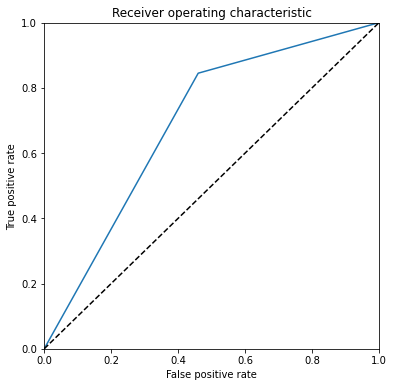

In [75]:
matrix(y_test, int_single_pred[n], int_single_proba[n])

### External Test

In [63]:
# Single
ext_single_proba= []
for m in model:
    proba = m.predict(x_ext)
    ext_single_proba.append(proba)
    
ext_single_pred = []
for s in ext_single_proba:
    proba = (s > 0.5).astype(np.int64)
    ext_single_pred.append(proba)
    
# Ensemble
ext_results = np.zeros( (x_ext.shape[0],2) )
for s in ext_single_proba:
    ext_results = ext_results + s

ext_y_proba = ext_results/5
ext_y_pred = (ext_y_proba > 0.5).astype(np.int64)

[[ 20 485]
 [  1 209]] 

Acc 0.3203
Sensitivity 0.9952
Specificity 0.0396
AUROC 0.5913
Precision 0.3012
Recall 0.9952
F1 0.4624
Weighted accuracy 0.5174 

              precision    recall  f1-score   support

           0       0.95      0.04      0.08       505
           1       0.30      1.00      0.46       210

   micro avg       0.32      0.32      0.32       715
   macro avg       0.63      0.52      0.27       715
weighted avg       0.76      0.32      0.19       715
 samples avg       0.32      0.32      0.32       715



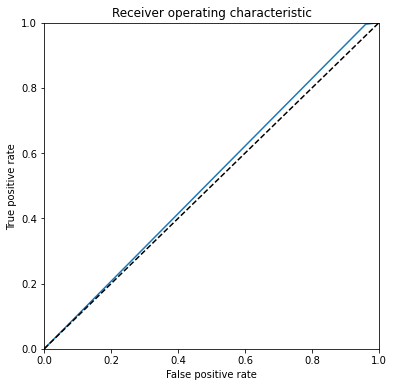

In [64]:
matrix(y_ext, ext_y_pred, ext_y_proba)

In [67]:
n=3

[[  1 504]
 [  0 210]] 

Acc 0.2951
Sensitivity 1.0
Specificity 0.002
AUROC 0.504
Precision 0.2941
Recall 1.0
F1 0.4545
Weighted accuracy 0.501 

              precision    recall  f1-score   support

           0       1.00      0.00      0.00       505
           1       0.29      1.00      0.45       210

   micro avg       0.30      0.30      0.30       715
   macro avg       0.65      0.50      0.23       715
weighted avg       0.79      0.30      0.14       715
 samples avg       0.30      0.30      0.30       715



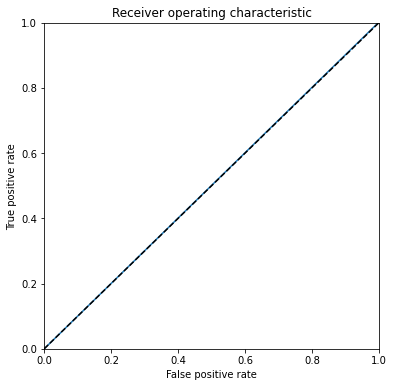

In [68]:
matrix(y_ext, ext_single_pred[n], ext_single_proba[n])

#### Uncertainty - Entropy

In [113]:
ext_en_entropy_list = []
for i in range(len(ext_y_proba)):
    pq = ext_y_proba[i] * y_ext[i]
    index = np.argmax(pq)
    p = pq[index]
    entropy = -p*math.log(p) - (1-p)*math.log(1-p+ 0.00000000001)
    ext_en_entropy_list.append(entropy)

In [114]:
ext_sing_entropy_list = []
for i in range(len(ext_single_proba[n])):
    pq = ext_single_proba[n][i] * y_ext[i]
    index = np.argmax(pq)
    p = pq[index]
    entropy = -p*math.log(p) - (1-p)*math.log(1-p+ 0.00000000001)
    ext_sing_entropy_list.append(entropy)

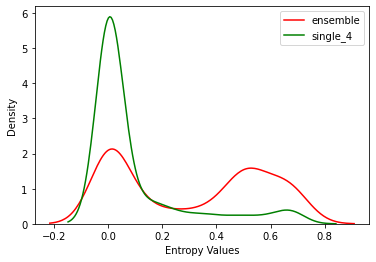

In [115]:
sns.kdeplot(ext_en_entropy_list, label='ensemble', color='r')
sns.kdeplot(ext_sing_entropy_list, label='single_4', color='g')
plt.xlabel('Entropy Values')
plt.legend()
plt.show()

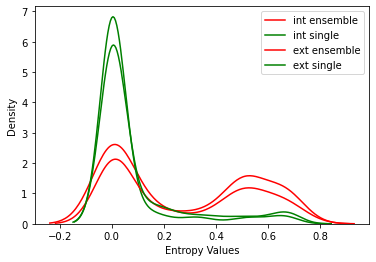

In [45]:
import seaborn as sns
sns.kdeplot(in_en_entropy_list, label='int ensemble', color='r')
sns.kdeplot(in_sing_entropy_list, label='int single', color='g')
sns.kdeplot(ext_en_entropy_list, label='ext ensemble', color='r')
sns.kdeplot(ext_sing_entropy_list, label='ext single', color='g')
plt.xlabel('Entropy Values')
plt.legend()
plt.show()

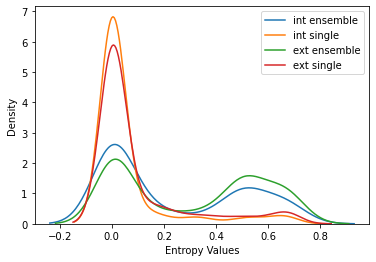

In [46]:
import seaborn as sns
sns.kdeplot(in_en_entropy_list, label='int ensemble')
sns.kdeplot(in_sing_entropy_list, label='int single')
sns.kdeplot(ext_en_entropy_list, label='ext ensemble')
sns.kdeplot(ext_sing_entropy_list, label='ext single')
plt.xlabel('Entropy Values')
plt.legend()
plt.show()

In [140]:
ext_high, ext_low = uc_grouping(ext_en_entropy_list, cutoff=0.25)

In [180]:
print("External Uncertainty High: %.2f%%" % (len(ext_high) / len(ext_en_entropy_list) * 100.0))
print("External Uncertainty Low: %.2f%%" % (len(ext_low) / len(ext_en_entropy_list) * 100.0))

External Uncertainty High: 53.85%
External Uncertainty Low: 46.15%


In [141]:
np.mean(np.array(ext_en_entropy_list))

0.30905924008727664

In [142]:
# Matrix 위해 ensemble 결과 필요
y_ext_high = y_ext[ext_high]
ext_y_pred_high = ext_y_pred[ext_high]
ext_y_proba_high = ext_y_proba[ext_high]

y_ext_low = y_ext[ext_low]
ext_y_pred_low = ext_y_pred[ext_low]
ext_y_proba_low = ext_y_proba[ext_low]

[[208 104]
 [ 36  37]] 

Acc 0.6364
Sensitivity 0.5068
Specificity 0.6667
AUROC 0.61
Precision 0.2624
Recall 0.5068
F1 0.3458
Weighted accuracy 0.5868 

              precision    recall  f1-score   support

           0       0.85      0.67      0.75       312
           1       0.26      0.51      0.35        73

   micro avg       0.64      0.64      0.64       385
   macro avg       0.56      0.59      0.55       385
weighted avg       0.74      0.64      0.67       385
 samples avg       0.64      0.64      0.64       385



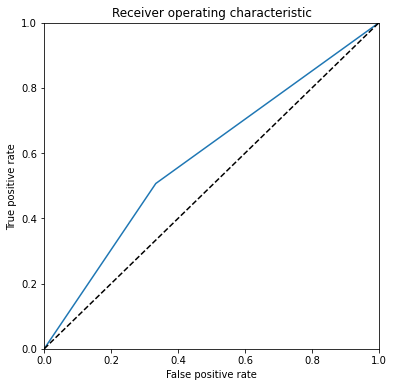

[[144  49]
 [ 18 119]] 

Acc 0.797
Sensitivity 0.8686
Specificity 0.7461
AUROC 0.8589
Precision 0.7083
Recall 0.8686
F1 0.7803
Weighted accuracy 0.8074 

              precision    recall  f1-score   support

           0       0.89      0.75      0.81       193
           1       0.71      0.87      0.78       137

   micro avg       0.80      0.80      0.80       330
   macro avg       0.80      0.81      0.80       330
weighted avg       0.81      0.80      0.80       330
 samples avg       0.80      0.80      0.80       330



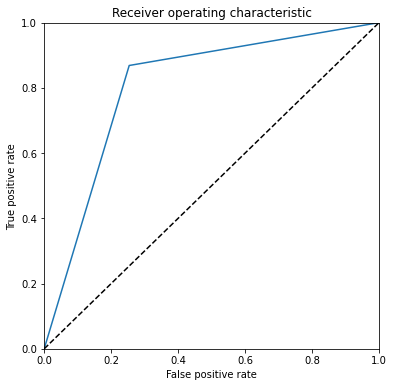

In [143]:
#cutoff = 0.25
matrix(y_ext_high, ext_y_pred_high, ext_y_proba_high)
matrix(y_ext_low, ext_y_pred_low, ext_y_proba_low)

In [138]:
'''
ext_all_gradcam = []
for md in model:
    gradcam = gradcam_list(x_ext, md, alpha=0.8)
    ext_all_gradcam.append(gradcam)
'''

In [139]:
with open('../../dryou_mount/SJEOM/Brain-GBMmeta/data_five_1d/model21_data/ext_all_gradcam_220111.pickle', 'rb') as f:
    ext_all_gradcam = pickle.load(f)

In [144]:
ext_all_gradcam_high=[]
for cam in ext_all_gradcam:
    wow = []
    for i in ext_high:
        wow.append(cam[i])
    ext_all_gradcam_high.append(wow)
    
ext_all_gradcam_low=[]
for cam in ext_all_gradcam:
    wow = []
    for i in ext_low:
        wow.append(cam[i])
    ext_all_gradcam_low.append(wow)

In [145]:
ext_single_pred_high = []
for s in ext_single_pred:
    sp = s[ext_high]
    ext_single_pred_high.append(sp)
    
ext_single_pred_low = []
for s in ext_single_pred:
    sp = s[ext_low]
    ext_single_pred_low.append(sp)

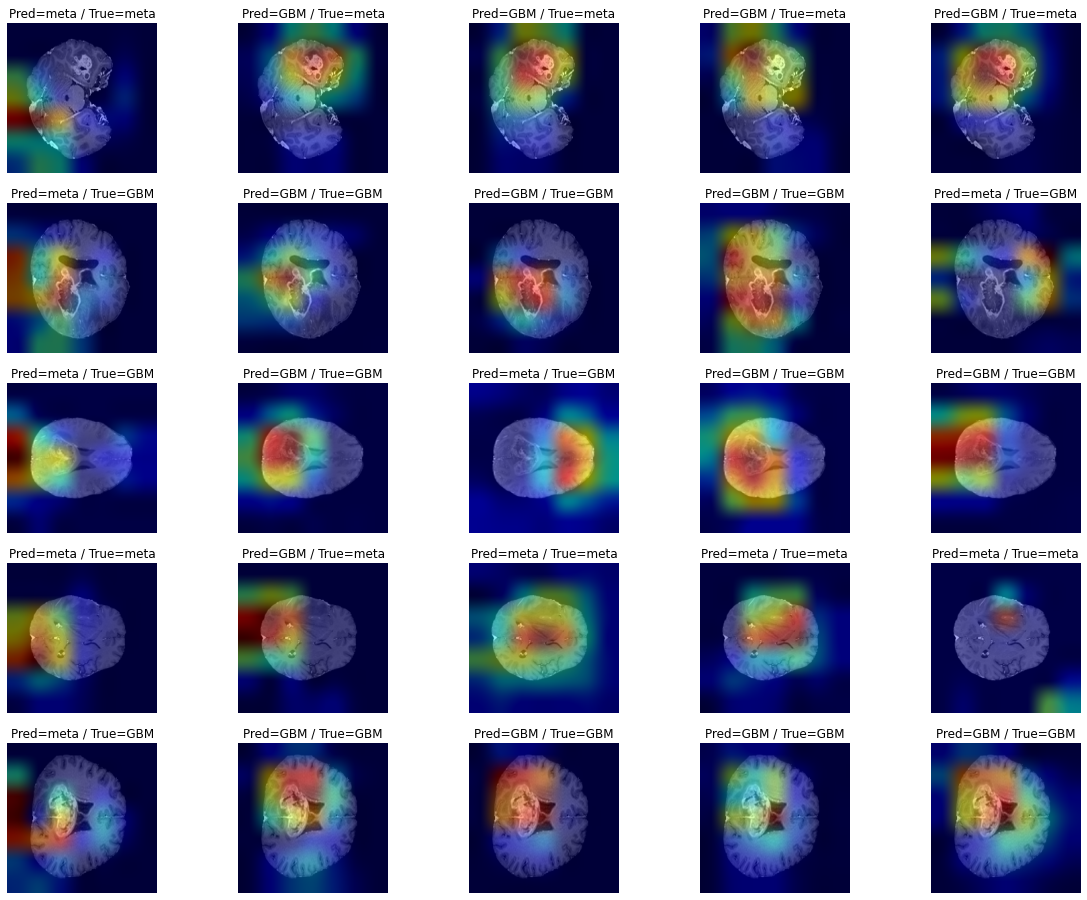

In [146]:
ensemble_gradcam_plot(ext_all_gradcam_high, ext_single_pred_high, y_ext_high, n=5, m=0)

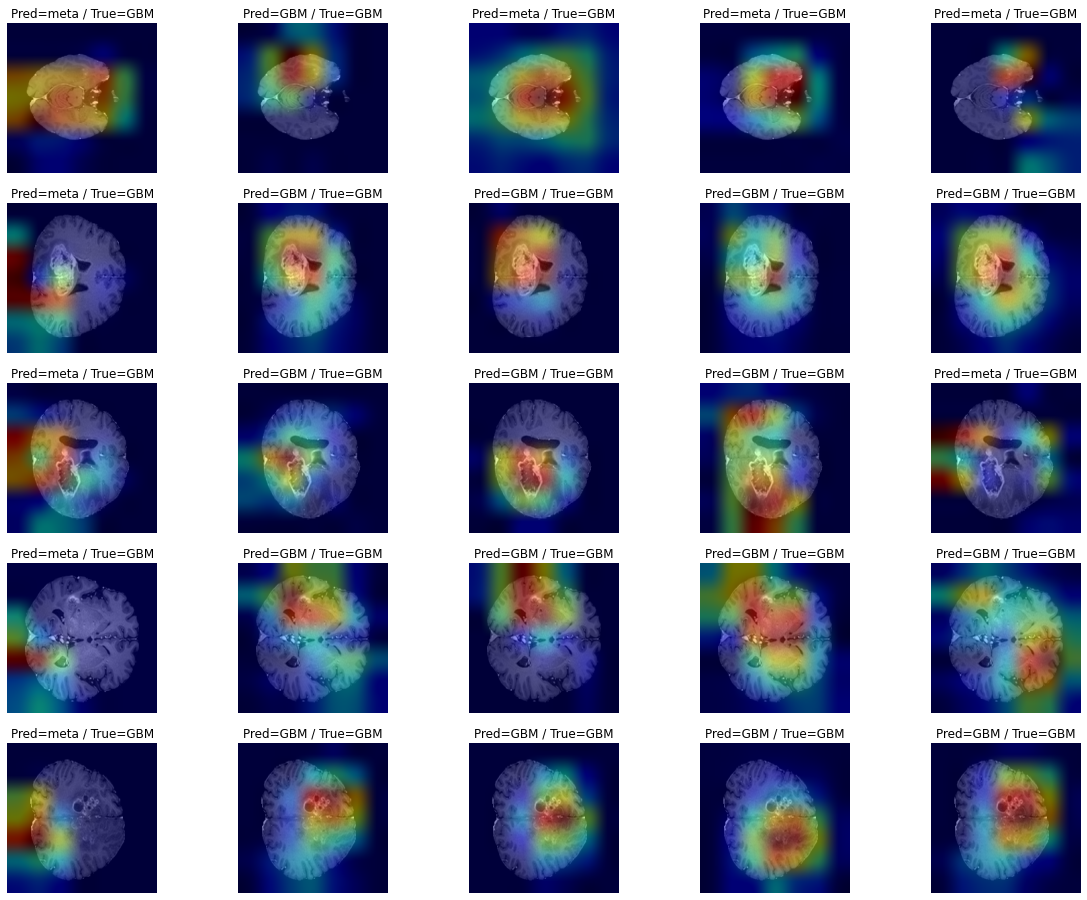

In [147]:
ensemble_gradcam_plot(ext_all_gradcam_high, ext_single_pred_high, y_ext_high, n=5, m=5)

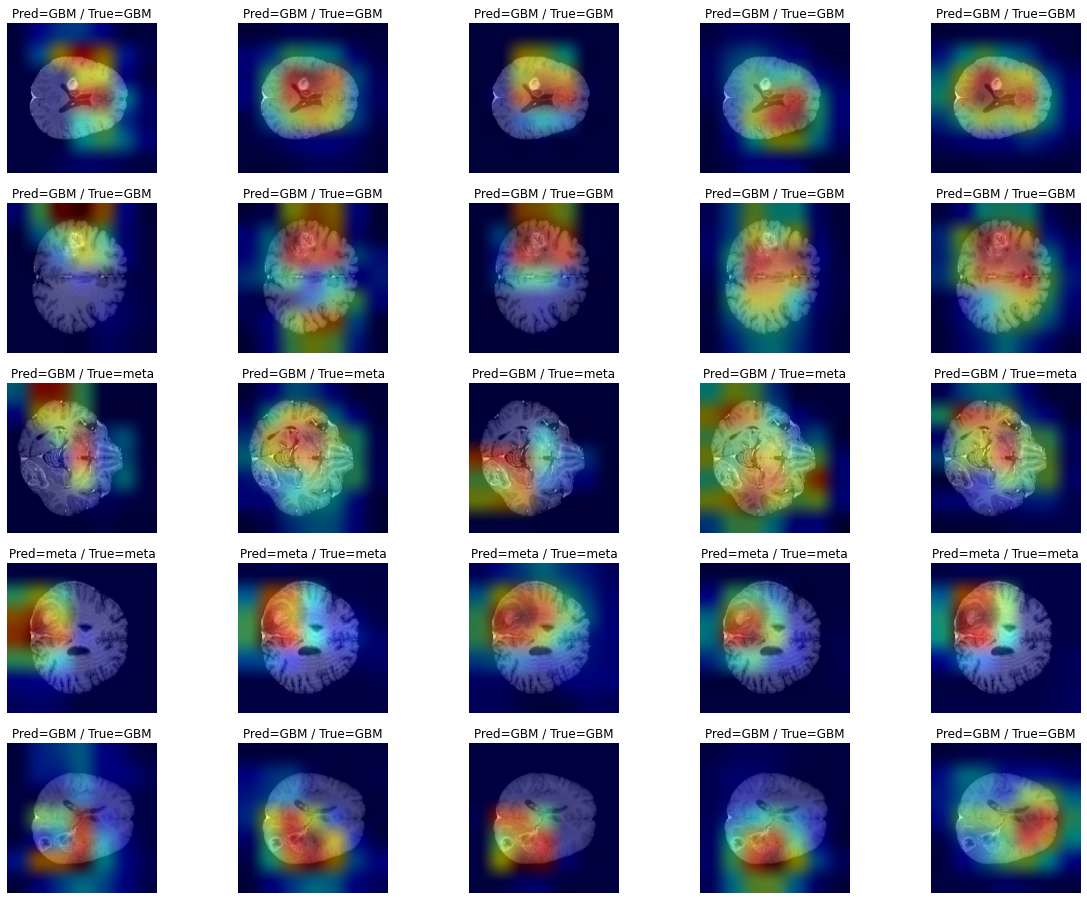

In [148]:
ensemble_gradcam_plot(ext_all_gradcam_low, ext_single_pred_low, y_ext_low, n=5, m=0)

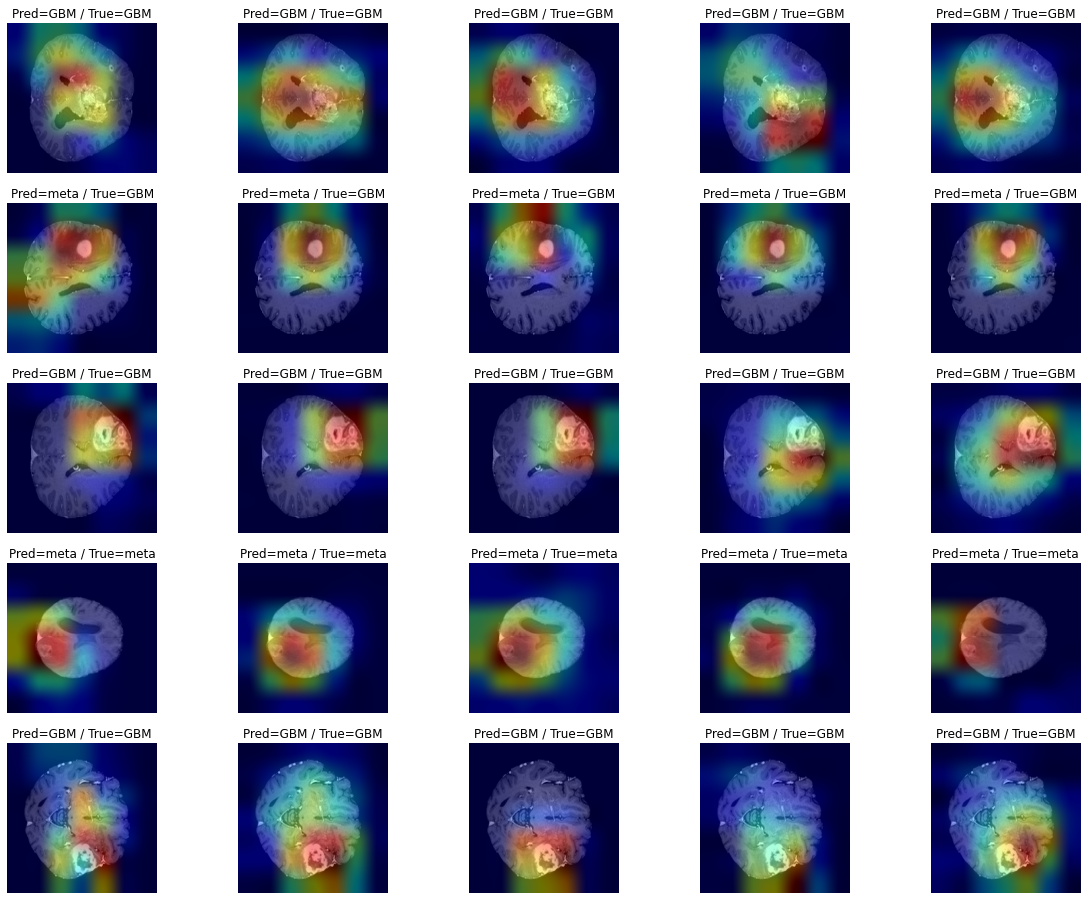

In [149]:
ensemble_gradcam_plot(ext_all_gradcam_low, ext_single_pred_low, y_ext_low, n=5, m=5)

## Grad-CAM

In [42]:
x_ext_gradcam, y_ext_prediction = gradcam_list(x_ext, model[0], alpha=0.8)

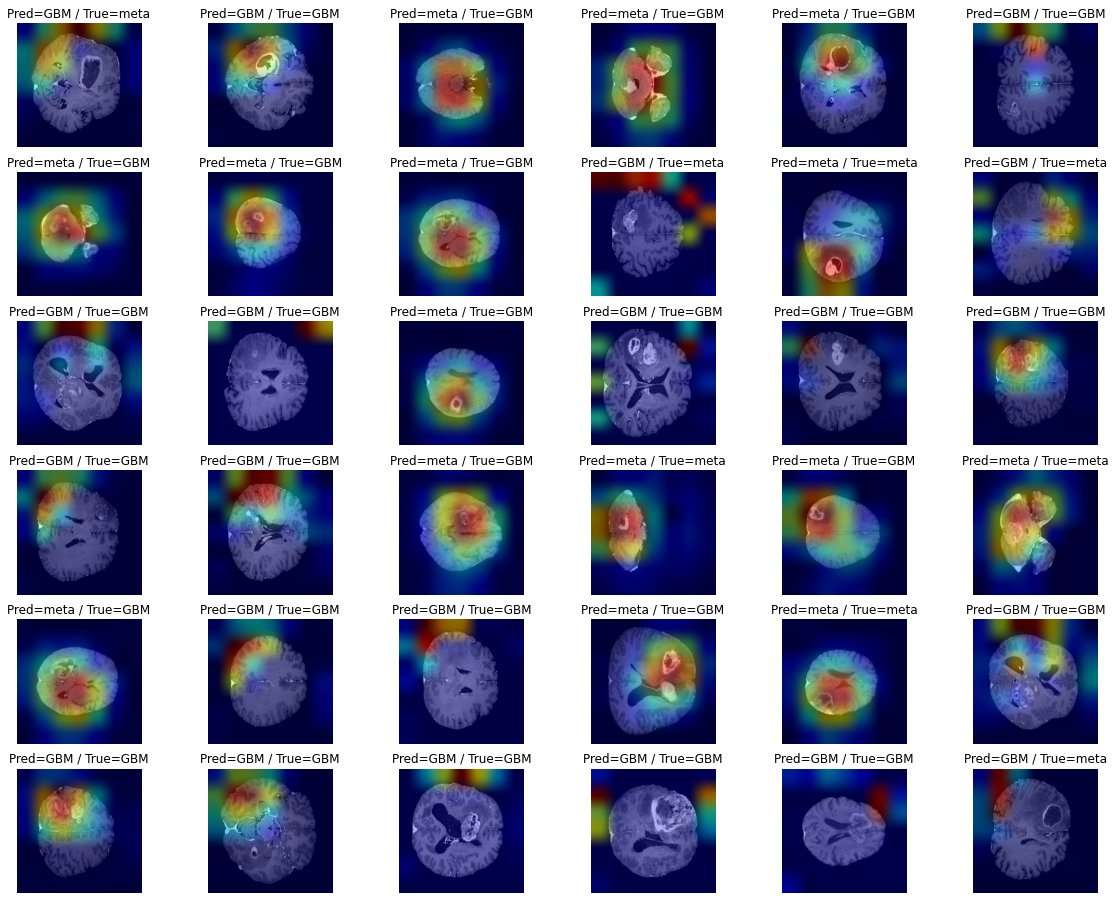

In [43]:
f, axarr = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(20, 16))
for i in range(6):
    for j in range(6):
        axarr[i, j].imshow(x_ext_gradcam[100+6*i+j])
        axarr[i, j].axis('off')
        if y_ext_prediction[100+6*i+j] == 0:
            y_p = 'GBM'
        else:
            y_p = 'meta'

        if np.argmax(y_ext, axis=1)[100+6*i+j] == 0:
            y_t = 'GBM'
        else: 
            y_t = 'meta'
        title = 'Pred=' + y_p + ' / True=' + y_t
        axarr[i, j].set_title(title)
#plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, bottom=0, top=1)
plt.show()
# alpha = 0.8